##  Optimze and a Dense Neural Network for gap filling and feature identification

** With a few tweaks to RepRunner, an LSTM can be run instead

In [235]:
import time
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations
from functools import partial
from multiprocessing import Pool
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split

## Personal Modules
import ReadStandardTimeFill as RSTF
import importlib
import DenseNet as Dense
import MiscFuncs as MF
importlib.reload(Dense)
importlib.reload(RSTF)
importlib.reload(MF)

%matplotlib inline
%config IPCompleter.greedy=True

from scipy.optimize import minimize, curve_fit
from scipy.stats import norm
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import Matern, WhiteKernel, ConstantKernel
from matplotlib import cm

from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from ipywidgets import FloatProgress
from IPython.display import display
import os  
try:pool.close()
except:pass

In [236]:

# def ModSelect(Scope,Site):
#     if Site == 'Illisarvik':
# #         BaseFactors = ['Sedge','Shrub','Grass','Sparse','Out_of_Basin']
# #         BaseFactors = []
#         if Scope == 'Full':
#             Model = ['H','wind_speed','air_pressure','PPFD_Avg','AirTC_Avg','VPD',
#                     'Temp','VWC','Sedge','Shrub','Grass','Sparse','Out_of_Basin']
#         if Scope == 'Test':
#             Model = ['PPFD_Avg','wind_speed']
#     if Site == 'FishIsland':
#         BaseFactors = []
#         if Scope == 'Full':
#             Model = ['H','Wind Spd','air pressure','Ta','Rn','PPFD','Rain','Water Table',
#             'Ts 2.5 cm','Ts 15 cm','VWC','Active Layer','24H Rain','Wtr Tbl Trnd']
#         if Scope == 'Test':
#             Model = ['H','Water Table','Wind Spd','Active Layer']
#     return(Model)

MP=False
Scope = 'Test'
cwd = os.getcwd()
# for Site in ['Illisarvik','FishIsland']:
Site='Illisarvik'
FillVar = 'fch4'
Model = ['Sedge']#,'VWC']

#     for FillVar in ['fco2','fch4']:
Runs,params = MF.Params(Scope,FillVar,MP)
params['Dpath'] = cwd+'/'+Site+'/'
if __name__ == '__main__':
    if params['proc']>1:
        pool = Pool(processes=3,maxtasksperchild=75)
    else:
        pool = None
    
    RST = RSTF.ReadStandardTimeFill(params['Dpath']+'ECData.csv')
    RST.Scale(params['Y'],Model)
    y = RST.y*1.0
    X = RST.X*1.0
#     X_fill = RST.X_fill*1.0
    
    params['N']=int(y.shape[0]/30)
    
    Y_train,y_train,X_train,Y_val,y_val,X_val,i_train,i_val = Dense.RunNN(params,X,y,X_fill,
                                                                  RST.YScaled,RST.XScaled,pool)
    print(Y_train.shape)
    X_train,Y_train,y_train=MF.Wrap(X_train,Y_train,y_train)
    X_val,Y_val,y_val=MF.Wrap(X_val,Y_val,y_val)
    print(Y_train.shape)
#     Y_train = Y_train.reshape(Y_train.shape[1]*params['K'])
#     print(Y_fill.shape)
    
    if pool is not None:
        pool.close()
        
#     ## Calculate CI
#     Y_train_bar = np.asanyarray(Y_train).mean(axis=0)
#     y_train_bar = np.asanyarray(y_train).mean(axis=0)
#     Y_val_bar = np.asanyarray(Y_val).mean(axis=0)
#     y_val_bar = np.asanyarray(y_val).mean(axis=0)
    
#     Y_train_var = np.asanyarray(Y_train).std(axis=0)
#     y_train_var = np.asanyarray(y_train).std(axis=0)
#     Y_val_var = np.asanyarray(Y_val).std(axis=0)
#     y_val_var = np.asanyarray(y_val).std(axis=0)
    
# #     Y_fill_bar = np.asanyarray(Y_fill).mean(axis=0)
# #     Y_eval_bar = np.asanyarray(Y_eval).mean(axis=0)
# #     y_val_bar = np.asanyarray(y_val).mean(axis=0)

# #     Y_fill_var = np.asanyarray(Y_fill).std(axis=0)**2
# #     Y_eval_var = np.asanyarray(Y_eval).std(axis=0)**2
# #     y_val_var = np.asanyarray(y_val).std(axis=0)**2
    
    
#     MSE_Boot = ((Y_train-Y_train_bar)**2).sum(axis=0)
#     CI = stats.t.ppf(1-0.025,params['K'])*(1/(params['K']-1)*(MSE_Boot))**.5
#     print(CI.shape)
    
# #     RST.Master['TempFill'] = Y_fill_bar
# #     RST.Master['TempVar'] = Y_fill_var
# #     RST.Master['CI'] = CI
    
#     ## Calculate PI
#     tempK = params['K']+0
#     params['K']=1
# #     params['Loss'] = 'Variance_Loss'
    
#     VarEst = True
#     if VarEst==True:
#         y = Y_fill_var
#         YStandard = StandardScaler()
#         YScaled = YStandard.fit(y.reshape(-1, 1))
#         y = YScaled.transform(y.reshape(-1, 1))
#         X = X_fill
#     else:
#         YStandard=RST.YScaled
    
    
#     init = int(np.random.rand(1)*100) # Random Initialization
    
#     Y_Var_Pred,Y_Var_eval_Pred,y_Var_val_Pred = Dense.TTV_Split(init,params,X,y,X_fill)
#     Y_Var_Pred = YScaled.inverse_transform(Y_Var_Pred).reshape(-1,1)
#     print(Y_Var_Pred.shape)
    
# #     Y_Var_Pred = (Y_Var_Pred)**.5*1.96
# #     Y_Var_eval_Pred = Y_Var_eval_Pred
# #     y_Var_val_Pred = y_Var_val_Pred
    
#     RST.Master['PI'] = (Y_Var_Pred)**.5*1.96
#     print(Y_Var_Pred.shape)
# #     print(results)
    
print('Done!!')

0.9500000000000001
(2, 783, 1)
(1566,)
Done!!


(2, 783, 1)
(2, 783)
0 783


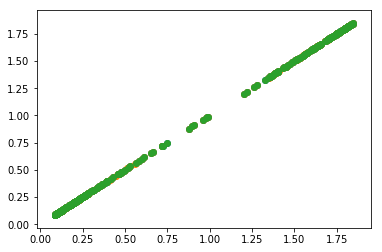

In [221]:




# YTS = X_train.shape[1]
# print(X_train.shape)
# X_train2 = X_train.reshape(X_train.shape[0],X_train.shape[-1]*YTS)
# print(X_train2.shape)
# for i in range( X_train.shape[2]):
#     print(i*YTS,(i+1)*YTS)
#     plt.scatter(X_train[0,:,i],X_train2[0,i*YTS:(i+1)*YTS])
# RST.Master['Var'] = Y_fill_var
# Factor = Model[0]
# Temp = RST.Master[[Factor,'TempFill','CI','PI','Var']].sort_values(Factor).dropna(axis=0)
# Temp['Low']=Temp['TempFill']-Temp['CI']
# Temp['High']=Temp['TempFill']+Temp['CI']

# plt.figure(figsize = (10,10))
# plt.scatter(RST.Master[Factor],RST.Master[FillVar])
# plt.plot(Temp[Factor],Temp['TempFill'],color='yellow')

# plt.fill_between(Temp[Factor], Temp['Low'], Temp['High'], color = 'green', alpha = 0.4, label = '95% CI')

# Temp['Low']=Temp['TempFill']-Temp['PI']
# Temp['High']=Temp['TempFill']+Temp['PI']

# plt.fill_between(Temp[Factor], Temp['Low'], Temp['High'], color = 'red', alpha = 0.4, label = '95% CI')

# plt.figure()
# plt.plot(Temp[Factor],Temp['PI'],label='PI')
# plt.plot(Temp[Factor],Temp['CI'],label='CI')
# plt.legend()

# plt.figure()
# plt.plot(Y_Var_Pred)

In [ ]:
def Curve(x,a,b,c):
    return (a*x**2+b*x+c)

def TTV_Split(iteration,Memory,X,y,params,X_fill):
    params['seed'] = int(iteration%params['splits_per_mod']/params['splits_per_mod']*100)
    params['iteration'] = int(iteration/params['splits_per_mod'])
    X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.1, random_state=params['seed'])
    X_train,X_val,y_train,y_val=train_test_split(X_train,y_train, test_size=0.11, random_state=params['seed'])
    return(Dense.Train_Steps(params,X_train,X_test,X_val,y_train,y_test,
        y_val,X_fill = X_fill,Memory=Memory),
        y_val)

def RunReps(Model,params,pool = None,FullReturn=False):
    RST = RSTF.ReadStandardTimeFill(params['Dpath']+'ECData.csv')
    offset = 5/params['proc']
    Memory = (math.floor(100/params['proc'])- offset) * .01
    MSE = []
    RST.Scale(params['Y'],Model)
    y = RST.y*1.0
    X = RST.X*1.0
    X_fill = RST.X_fill*1.0
    MAE = []
    R2 =[]
    Y_fill = []
    if params['Prelim_N']==True:
        params['N']=int(y.shape[0]*.8/30)
    if __name__=='__main__'and params['proc'] != 1:
        for i,results in enumerate(pool.imap(partial(TTV_Split,Memory=Memory,X=X,y=y,params=params,X_fill=X_fill),range(params['K']))):
            Y_fill.append(results[0][0])
            Yval = RST.YScaled.inverse_transform(results[0][1].reshape(-1,1))
            y_val = RST.YScaled.inverse_transform(results[1].reshape(-1,1))
            MAE.append(metrics.mean_absolute_error(Yval,y_val))
            R2.append(metrics.r2_score(Yval,y_val))
    else:
        for i in range(params['K']):
            results = TTV_Split(i,Memory,X,y,params,X_fill)
            Y_fill.append(results[0][0])
            Yval = RST.YScaled.inverse_transform(results[0][1].reshape(-1,1))
            y_val = RST.YScaled.inverse_transform(results[1].reshape(-1,1))
            MAE.append(metrics.mean_absolute_error(y_val,Yval))
            R2.append(metrics.r2_score(y_val,Yval))
            
            
    
    tempK = params['K']+0
    params['K']=1

    params['Loss'] = 'Variance_Loss'
    y = Yfill.std(axis=0)**2
    X = X_fill

    results = TTV_Split(i,Memory,X,y,params,X_fill)
    params['K'] = tempK
    Y_var = (RST.YScaled.inverse_transform(results[0][0].reshape(-1,1))).mean(axis=-1)
#         Yval=RST.YScaled.inverse_transform(results[0][1].reshape(-1,1))
#         y_val=RST.YScaled.inverse_transform(results[1].reshape(-1,1))
#         print(Y_var.shape)
    MSE_Boot = ((Yfill-Yfill_bar)**2).sum(axis=0)
    SE = stats.t.ppf(1-0.025,params['K'])*(1/(params['K']-1)*(MSE_Boot))**.5
    PI = 1.96*Y_var**.5
    print(SE.shape)
    RST.Master['CI'] = SE
    RST.Master['PI'] = Y_var
    plt.figure()
    plt.bar(RST.Master.index,RST.Master['TempFill'],RST.Master['PI'])
            
    Y_fill = np.asanyarray(Y_fill)
    Y_fill = Y_fill.mean(axis=0) 
    FillVarName = FillVar.replace('f','F')
    RST.Fill(Y_fill,FillVarName)
    return(MAE,R2,RST.Master['TempFill'])

def RunLoop(Runs,model):
    style = {'description_width': 'initial'}
    f = FloatProgress(min=0, max=Runs['N'].count(),description='Finding Best N:',style=style) # instantiate the bar
    display(f) # display the bar
    i = 0
    for N in Runs['N'].unique():
        params['T'] = 0
        params['N']=N
        Results = RunReps(model,params,pool)
        MAE = Results[0]
        R2 = Results[1]
        Runs.loc[Runs['N']==N,'MAE']=MAE
        Runs.loc[Runs['N']==N,'R2']=R2
        f.value+=params['K']
        MAE = Runs.loc[Runs['MAE']!=0].groupby('N').mean()#.values[0]
        MAE['se'] = Runs.loc[Runs['MAE']!=0,['N','MAE']].groupby('N').sem()#.values[0]
        Val = MAE['MAE'].min()+MAE.loc[MAE['MAE']==MAE['MAE'].min(),'se'].values[0]
        if i > 2:
            if np.asanyarray(MAE).mean()>Val:
                Runs = Runs.loc[Runs['MAE']!=0]
                print('Leaving at ',N)
                break
        i+=1                
    return(Runs)

def N_Nodes(Runs,params,model,plot=False):
    params['Prelim_N']=False
    Runs = RunLoop(Runs,model)
    Group = Runs.groupby('N').mean()
    Group['Count'] = Runs[['N','MAE']].groupby('N').count()
    Group['SD'] = Runs[['N','MAE']].groupby('N').std()
    Group['SE'] = Runs[['N','MAE']].groupby('N').sem()
    Group = Group.reset_index()
    Min = Group.loc[Group['MAE']==Group['MAE'].min()]
    popt, pcov = curve_fit(Curve, Runs['N'].values, Runs['MAE'].values)
    N = np.arange(Runs['N'].min(),Runs['N'].max())
    Fit = Curve(N,*popt)
    Max = (Min['MAE']+Min['SE']).values[0]
    try:
        params['N']=N[Fit<Max].min()
    except:
        print('Fitting failed to produce meaningful results')
        params['N'] = Group.loc[Group['MAE']<+Min['MAE'].values[0]+Min['SE'].values[0],'N'].values[0]
        pass
    
    if plot == True:
        fig,ax = plt.subplots(figsize=(8,8))
        ax.scatter(Runs['N'],Runs['MAE'])
        ax.plot(N,Fit,color='r')
        ax.plot(N,N*0+Max,color = 'black')
        plt.grid()
        plt.show()
    return(params,Runs,Group)

def FactorTest(params,FullModel,Runs):
    prog1 = FloatProgress(min=0, max=len(FullModel)-1,description='FactorTesting:') # instantiate the bar
    display(prog1) # display the bar
    Scores = pd.DataFrame()
    ModelRuns = pd.DataFrame()
    Start = 1
    for level in range(Start,len(FullModel)+1):
        if level == 1:
            Models = MF.Combos(FullModel,level)
        else:
            Models = MF.Combos(FullModel,level,factor = Best)
        print('Number of Models: ',len(Models))
        prog2 = FloatProgress(min=0, max=len(Models),description='Level: '+str(level)) # instantiate the bar
        display(prog2) # display the bar
        Values = []
        for j,model in enumerate(Models):
            key = str(level)+'_'+str(j)
            Name = '+'.join(model)
            Results = RunReps(model,params,pool)
            MAE = Results[0]
            R2 = Results[1]
            d = {'Model':'+'.join(model),'MAE':MAE,'Key':key,'R2':R2,'Level':level}#,'Best':'N'
            score = pd.DataFrame(index=[x for x in range(params['K'])],data=d)
            Scores = Scores.append(score,ignore_index=True)## Might cause problems in older versions
            ModelRuns['Model: '+'+'.join(model)] = Results[2]    
            prog2.value+=1
        Group = Scores.groupby('Key').agg({'Model': 'first','Level': 'first','MAE': 'mean','R2': 'mean'}) 
        Group['SE'] = Scores[['Key','MAE']].groupby('Key').sem()
        Min = Group.loc[Group['Level']==level]
#         print(Min)
        Mod2Beat = Min.loc[Min['MAE'] == Min['MAE'].min()]
        print('Best Model @ Level ',level)
        print(Mod2Beat)
        if level>Start:
            print('Should we exit??', (Mod2Beat['MAE']+Mod2Beat['SE']).values[0],LastMin)
            if (Mod2Beat['MAE']+Mod2Beat['SE']).values[0]>LastMin:
                print('Exit Early')
                Scores = Scores.loc[Scores['Level']<level]
                break
        LastMin = Min['MAE'].min()
        Best = Mod2Beat['Model'].values
        prog1.value+=1
    Group = Scores.groupby('Key').agg({'Model': 'first','Level': 'first','MAE': 'mean','R2': 'mean'})
    Group['SE'] = Scores[['Key','MAE']].groupby('Key').sem()
    Min = Group.loc[Group['Level']==level]
    return(Best,Scores,ModelRuns)

def Best_Fill(Best,Runs,Scores,params):
    N = Runs['N']
    NRuns = Runs*0
    NRuns['N']=N
    model = Best[0].split('+')

    params,Runs,Group = N_Nodes(NRuns,params,model,plot=True)
    level = 0
    key = '0_'+str(params['N'])
    Name = '+'.join(Best)
    Results = RunReps(model,params,pool)
    MSE = Results[0]
    R2 = Results[1]
    d = {'Model':'+'.join(model),'MAE':MSE,'Key':key,'R2':R2,'Level':level}#,'Best':'N'
    score = pd.DataFrame(index=[x for x in range(params['K'])],data=d)
    Scores = Scores.append(score,ignore_index=True)
    ModelRuns['BestModel: '+'+'.join(model)] = Results[2] 
    print(params['N'])
    return(Scores,ModelRuns)

# The "Optimum" Sized Model

In [ ]:
# pool.close()
# Site = 'Illisarvik'#'FishIsland'#
Scope = 'Test'
cwd = os.getcwd()
def ModSelect(Scope,Site):
    if Site == 'Illisarvik':
#         BaseFactors = ['Sedge','Shrub','Grass','Sparse','Out_of_Basin']
#         BaseFactors = []
        if Scope == 'Full':
            Model = ['H','wind_speed','air_pressure','PPFD_Avg','AirTC_Avg','VPD',
                    'Temp','VWC','Sedge','Shrub','Grass','Sparse','Out_of_Basin']
        if Scope == 'Test':
            Model = ['PPFD_Avg','wind_speed']
    if Site == 'FishIsland':
        BaseFactors = []
        if Scope == 'Full':
            Model = ['H','Wind Spd','air pressure','Ta','Rn','PPFD','Rain','Water Table',
            'Ts 2.5 cm','Ts 15 cm','VWC','Active Layer','24H Rain','Wtr Tbl Trnd']
        if Scope == 'Test':
            Model = ['H','Water Table','Wind Spd','Active Layer']
    return(Model)

# def Params(Func,Y,MP = True):
#     params = {}
#     params['proc']=3
#     if MP == False:
#         params['proc']=1
#     if Func == 'Full':
#         epochs = 200
#         K = 30
#         splits_per_mod = 1
#         N = np.linspace(200,20,10,dtype='int32')
#     elif Func == 'Test':
#         epochs = 200
#         K = 30
#         splits_per_mod = 1
#         N = np.linspace(70,10,5,dtype='int32')
#     N = np.repeat(N,K)
#     d = {'N':N.astype(int)}
#     Runs = pd.DataFrame(data=d)
#     Runs['MAE'] = 0.0
#     Runs['R2'] = 0.0
#     Runs['Model']=0
#     params['K'] = K
#     params['epochs'] = epochs
#     params['Y'] = Y
#     params['splits_per_mod'] = splits_per_mod
#     params['Save'] = {}
#     params['Save']['Weights']=False
#     params['Save']['Model']=False
    
#     return(Runs,params)


MP=False

if Scope == 'Full':
    MP = True
if __name__=='__main__'and MP==True:
    pool = Pool(processes=3,maxtasksperchild=75)
else:pool=None
    
# for Site in ['Illisarvik','FishIsland']:
Site='Illisarvik'
FillVar = 'fco2'
#     for FillVar in ['fco2','fch4']:
Runs,params = MF.Params(Scope,FillVar,MP)
FullModel = ModSelect(Scope,Site)
print(FullModel)
params['Dpath'] = cwd+'/'+Site+'/'
params['Prelim_N']=True
Best,Scores,ModelRuns = MF.FactorTest(params,FullModel,Runs)
# print(Best,Scores)
# Scores,ModelRuns = Best_Fill(Best,Runs,Scores,params)
# Scores.to_csv(params['Dpath']+FillVar+'/GapFillingSummary.csv')
# ModelRuns.to_csv(params['Dpath']+FillVar+'/GapFilled.csv')

# if __name__=='__main__'and MP==True:
#     pool.close()

In [ ]:
# Grp = Scores.groupby('Model').mean()
# Grp['SE'] = Scores[['Model','MAE']].groupby('Model').sem()
# # Grp['SE'] = Scores[['Key','MAE']].groupby('Key').sem()
# print(Grp)
# # plt.bar(Grp.index,Grp['MAE'],yerr=Grp['SE'])

In [ ]:
print('kitty')